# 1.1 수학과 파이썬 복습

## 1.1.1 벡터와 행렬

In [ ]:
import numpy as np

x=np.array([1,2,3])

In [ ]:
x.__class__ # 클래스 이름 표시

numpy.ndarray

In [ ]:
x.shape # 다차원 배열의 형상

(3,)

In [ ]:
x.ndim # 차원의 수

1

In [ ]:
W=np.array([[1,2,3],[4,5,6]])

In [ ]:
W.shape

(2, 3)

In [ ]:
W.ndim

2

## 1.1.2 행렬의 원소별 연산

In [ ]:
W=np.array([[1,2,3],[4,5,6]])
X=np.array([[0,1,2],[3,4,5]])


In [ ]:
W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [ ]:
W*X

array([[ 0,  2,  6],
       [12, 20, 30]])

## 1.1.3 브로드캐스트

In [ ]:
A=np.array([[1,2],[3,4]])

In [ ]:
A*10

array([[10, 20],
       [30, 40]])

In [ ]:
b=np.array([10,20])
A*b

array([[10, 40],
       [30, 80]])

## 1.1.4 벡터의 내적과 행렬의 곱

In [ ]:
a=np.array([1,2,3])
b=np.array([4,5,6])
np.dot(a,b)

32

In [ ]:
A=np.array([[1,2],[3,4]])
B=np.array([[5,6],[7,8]])
np.matmul(A,B)


array([[19, 22],
       [43, 50]])

# 1.2 신경망의 추론

## 1.2.1 신경망 추론 전체 그림

In [ ]:
import numpy as np

x=np.random.randn(10,2) # 입력
W1=np.random.randn(2,4) # 가중치1
b1=np.random.randn(4) # 편향1
W2=np.random.randn(4,3) # 가중치2
b2=np.random.randn(3) # 편향2


In [ ]:
W1

array([[ 0.1809142 , -0.720681  , -1.15947333,  0.68049104],
       [ 0.51816547,  2.42271808, -1.50691269, -1.56410327]])

In [ ]:
b1

array([ 0.54059719, -0.94851073, -0.36477024, -0.31778441])

In [ ]:
x

array([[-0.24167147,  0.64422863],
       [ 0.18262912,  1.42703604],
       [ 1.25197027, -0.98305603],
       [ 1.07558805,  0.33676189],
       [ 0.01695555,  0.92365643],
       [-0.09870497, -1.92987268],
       [-0.85209606, -0.14611978],
       [ 0.95489314,  0.32355764],
       [-2.46930167, -0.29866658],
       [-1.24967923, -1.37551508]])

In [ ]:
h=np.matmul(x,W1)+b1
h

array([[ 0.83069241,  0.78644165, -1.05535492, -1.48987978],
       [ 1.31307818,  2.37717795, -2.72694255, -2.42553866],
       [ 0.2577107 , -4.23244954, -0.33501677,  2.0717713 ],
       [ 0.90968472, -0.90778747, -2.11935667, -0.11258675],
       [ 1.02227155,  1.27702887, -1.77629935, -1.75094035],
       [-0.47725332, -5.55291337,  2.65782518,  2.63356791],
       [ 0.31072669, -0.68842831,  0.84340216, -0.66908172],
       [ 0.88100731, -0.85279512, -1.95951649, -0.17406575],
       [-0.06089325,  0.10748314,  2.94838366, -1.5309767 ],
       [-0.39823194, -3.3803759 ,  3.15698063,  0.9832677 ]])

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
a=sigmoid(h)
a

array([[0.69650132, 0.68706677, 0.25819814, 0.18393977],
       [0.78802779, 0.91507037, 0.06140213, 0.08124586],
       [0.56407345, 0.01430907, 0.41702047, 0.88812907],
       [0.71293564, 0.2874528 , 0.10722964, 0.47188301],
       [0.73541483, 0.7819436 , 0.14476069, 0.14792863],
       [0.38290092, 0.00386118, 0.93449166, 0.93299096],
       [0.57706263, 0.33438279, 0.69918127, 0.33870249],
       [0.70703092, 0.29884685, 0.12351938, 0.45659311],
       [0.48478139, 0.52684495, 0.95018704, 0.17785083],
       [0.40173721, 0.03291443, 0.9591829 , 0.72775612]])

In [ ]:
s=np.matmul(a,W2)+b2
s

array([[ 1.76598362,  0.55491374, -0.61264772],
       [ 1.83821649,  0.27735871, -0.84771472],
       [ 2.11584328,  1.58978095,  0.24835783],
       [ 1.94335483,  1.02767046, -0.01907883],
       [ 1.79559829,  0.4325751 , -0.68738137],
       [ 1.96926002,  1.7334792 ,  0.06753491],
       [ 1.73116105,  1.04731046, -0.37751911],
       [ 1.92401516,  1.01047609, -0.0390885 ],
       [ 1.51499183,  0.82549696, -0.70575821],
       [ 1.802321  ,  1.57589572, -0.00748841]])

## 1.2.2 계층으로 클래스화 및 순전파 구현

In [ ]:
import numpy as np

class Sigmoid:
  def __init__(self):
    self.params=[]

  def forward(self,x):
    return 1/(1+np.exp(-x))

In [ ]:
class Affine:
  def __init__(self,W,b):
    self.params=[W,b]

  def forward(self,x):
    W,b=self.params
    out=np.matmul(x,W)+b
    return out

In [ ]:
class TwoLayerNet:
  def __init__(self,input_size,hidden_size,output_size):
    I,H,O=input_size,hidden_size,output_size
    
    # 가중치와 편향 초기화

    W1=np.random.randn(I,H)
    b1=np.random.randn(H)

    W2=np.random.randn(H,O)
    b2=np.random.randn(O)

    # 계층 생성
    self.layers=[
      Affine(W1,b1),
      Sigmoid(),
      Affine(W2,b2)
    ]

    # 모든 가중치를 리스트에 모은다.
    self.params=[]
    for layer in self.layers:
      self.params+=layer.params

  def predict(self,x):
    for layer in self.layers:
      x=layer.forward(x)
    return x

In [ ]:
x=np.random.randn(10,2)
model=TwoLayerNet(2,4,3)
s=model.predict(x)
s

array([[ 0.81601729, -1.16395526, -2.0590088 ],
       [ 0.86135259, -1.66623413, -2.17974501],
       [ 0.99390504, -0.76520834, -2.03196236],
       [ 0.6732738 , -1.80687166, -2.15107246],
       [ 0.73231013, -0.52322713, -1.94861991],
       [ 1.16788562, -0.40698827, -2.01077069],
       [ 1.38550369, -1.09994266, -2.17419345],
       [ 1.06212443, -0.68049935, -2.03267088],
       [ 0.78623451, -0.67962158, -1.97597109],
       [ 1.45151233, -0.73093715, -2.12884321]])

# 1.3 신경망의 학습(계산 그래프)

## Repeat Node

In [ ]:
import numpy as np
D,N=8,7
x=np.random.randn(1,D)
y=np.repeat(x,N,axis=0) # 순전파

dy=np.random.randn(N,D) # 무작위 기울기
dx=np.sum(dy,axis=0,keepdims=True) # 역전파


In [ ]:
y

array([[-0.74833372, -1.67543597,  0.4108679 ,  1.38931033, -0.64891041,
        -0.04953636,  1.62010434,  0.65997551],
       [-0.74833372, -1.67543597,  0.4108679 ,  1.38931033, -0.64891041,
        -0.04953636,  1.62010434,  0.65997551],
       [-0.74833372, -1.67543597,  0.4108679 ,  1.38931033, -0.64891041,
        -0.04953636,  1.62010434,  0.65997551],
       [-0.74833372, -1.67543597,  0.4108679 ,  1.38931033, -0.64891041,
        -0.04953636,  1.62010434,  0.65997551],
       [-0.74833372, -1.67543597,  0.4108679 ,  1.38931033, -0.64891041,
        -0.04953636,  1.62010434,  0.65997551],
       [-0.74833372, -1.67543597,  0.4108679 ,  1.38931033, -0.64891041,
        -0.04953636,  1.62010434,  0.65997551],
       [-0.74833372, -1.67543597,  0.4108679 ,  1.38931033, -0.64891041,
        -0.04953636,  1.62010434,  0.65997551]])

In [ ]:
dx

array([[ 0.38790274,  9.13235441,  1.82522012,  2.00290716, -1.39701687,
         2.71241938, -1.86729347,  1.197628  ]])

## Sum Node

In [ ]:
import numpy as np
D,N=8,7
x=np.random.randn(N,D)
y=np.sum(x,axis=0,keepdims=True)

dy=np.random.randn(1,D)
dx=np.repeat(dy,N,axis=0)

In [ ]:
x

array([[-0.03428679, -1.23015292, -0.73864221,  0.70335931,  0.30905424,
         0.48513801,  0.69189713, -0.24338189],
       [ 1.9142353 ,  0.83389387, -0.43110303, -0.81189806,  1.8567217 ,
         1.94926745,  0.33648357,  0.54124444],
       [-0.18648627,  0.40176983, -0.16568563, -0.71011409,  1.65716848,
        -0.40350469,  0.23984798, -1.1499549 ],
       [-1.05816989, -0.94965429, -1.52580268,  0.7200173 , -0.93237498,
         1.00747837,  0.36559481, -0.21550804],
       [ 1.47358268,  1.08051471, -0.01231457,  1.54797239,  0.58165608,
        -1.11752417,  1.00203701, -0.88182984],
       [ 0.0930907 , -0.0589553 ,  0.62866808, -0.09642904, -0.27375742,
        -1.05154053,  1.00137587,  1.14418041],
       [-0.17665341,  0.15037293,  0.5113279 , -2.71514495,  0.31667843,
        -0.10705211, -0.07135193,  1.14084763]])

In [ ]:
y

array([[ 2.02531232,  0.22778884, -1.73355214, -1.36223713,  3.51514652,
         0.76226232,  3.56588443,  0.3355978 ]])

In [ ]:
dx

array([[-1.31096453, -0.36792797,  1.0116622 ,  0.01177245, -0.12075291,
         0.04670614, -1.32569172, -0.27109166],
       [-1.31096453, -0.36792797,  1.0116622 ,  0.01177245, -0.12075291,
         0.04670614, -1.32569172, -0.27109166],
       [-1.31096453, -0.36792797,  1.0116622 ,  0.01177245, -0.12075291,
         0.04670614, -1.32569172, -0.27109166],
       [-1.31096453, -0.36792797,  1.0116622 ,  0.01177245, -0.12075291,
         0.04670614, -1.32569172, -0.27109166],
       [-1.31096453, -0.36792797,  1.0116622 ,  0.01177245, -0.12075291,
         0.04670614, -1.32569172, -0.27109166],
       [-1.31096453, -0.36792797,  1.0116622 ,  0.01177245, -0.12075291,
         0.04670614, -1.32569172, -0.27109166],
       [-1.31096453, -0.36792797,  1.0116622 ,  0.01177245, -0.12075291,
         0.04670614, -1.32569172, -0.27109166]])

## MatMul 노드

In [ ]:
class MatMul:
  def __init__(self,W):
    self.params=[W]
    self.grads=[np.zeros_like(W)]
    self.x=None

  def forward(self,x):
    W,=self.params
    out=np.matmul(x,W)
    self.x=x
    return out

  def backward(self,dout):
    W,=self.params
    dx=np.matmul(dout,W.T)
    dW=np.matmul(self.x.T,dout)
    self.grads[0][...]=dW # deep copy / shallow copy : grads[0]=dW
    return dx

## 1.3.5 기울기 도출과 역전파 구현

In [ ]:
class Sigmoid:
  def __init__(self):
    self.params, self.grads=[],[]
    self.out=None

  def forward(self,x):
    out=1/(1+np.exp(-x))
    self.out=out
    return out

  def backward(self,dout):
    dx=dout*(1.0-self.out)*self.out
    return dx

In [ ]:
class Affine:
  def __init__(self,W,b):
    self.params=[W,b]
    self.grads=[np.zeros_like(W),np.zeros_like(b)]
    self.x=None

  def forward(self,x):
    W,b=self.params
    out=np.matmul(x,W)+b
    self.x=x
    return out

  def backward(self,dout):
    W,b=self.params
    dx=np.matmul(dout,W.T)
    dW=np.matmul(self.x.T,dout)
    db=np.sum(dout,axis=0)

    self.grads[0][...]=dW
    self.grads[1][...]=db
    return dx



In [ ]:
class SoftmaxWithLoss:
  def __init__(self):
    self.params, self.grads=[],[]
    self.y=None # softmax의 출력
    self.t=None # 정답 레이블

  def forward(self,x,t):
    self.t=t
    self.y=softmax(x)

    # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
    if self.t.size==self.y.size:
      self.t=self.t.argmax(axis=1)

    loss = cross_entropy_error(self.y,self.t)
    return loss

  def backward(self,dout=1):
    batch_size=self.t.shape[0]
    dx=self.y.copy()

## 1.3.6 가중치 갱신

In [ ]:
class SGD:
  '''
  확률적 경사하강법
  '''
  
  def __init__(self,lr=0.01):
    self.lr=lr

  def update(self,params,grads):
    for i in range(len(params)):
      params[i]-=self.lr*grads[i]

In [ ]:
class AdaGrad:
  '''
  AdaGrad
  '''
  def __init__(self,lr=0.01):
    self.lr=lr
    self.h=None

  def update(self,params,grads):
    if self.h is None:
      self.h=[]

      for param in params:
        self.h.append(np.zeros_like(param))
    
    for i in range(len(params)):
      self.h[i]+=grads[i]*grads[i]
      params[i]-=self.lr*grads[i]/(np.sqrt(self.h[i])+1e-7)

# 1.4 신경망으로 문제를 풀다

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2

/content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2


In [ ]:
!pwd

/content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2


In [ ]:
!ls

ch01  ch03  ch05  ch07	common	   dataset			LICENSE.md
ch02  ch04  ch06  ch08	cover.png  equations_and_figures_2.zip	README.md


In [ ]:
from dataset import spiral

In [ ]:
import sys
import matplotlib.pyplot as plt
x,t=spiral.load_data()
print('x',x.shape) #(300,2)
print('t',t.shape) #(300,3)

x (300, 2)
t (300, 3)


## 1.4.2 신경망 구현

In [ ]:
import numpy as np
from common.layers import Affine,Sigmoid, SoftmaxWithLoss

In [ ]:
class TwoLayerNet:
  def __init__(self,input_size,hidden_size,output_size):
    I,H,O=input_size,hidden_size,output_size
    
    # 가중치와 편향 초기화
    W1=0.01*np.random.randn(I,H)
    b1=np.zeros(H)
    W2=0.01*np.random.randn(H,O)
    b2=np.zeros(O)

    # 계층 생성
    self.layers=[
        Affine(W1,b1),
        Sigmoid(),
        Affine(W2,b2)
    ]

    self.loss_layer=SoftmaxWithLoss()

    # 모든 가중치와 기울기를 리스트에 모은다.
    self.params,self.grads=[],[]

    for layer in self.layers:
      self.params+=layer.params
      self.grads+=layer.grads

  def predict(self,x):
    for layer in self.layers:
      x=layer.forward(x)
    return x

  def forward(self,x,t):
    score=self.predict(x)
    loss=self.loss_layer.forward(score,t)
    return loss

  def backward(self,dout=1):
    dout=self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout=layer.bacward(dout)
    return dout

## 1.4.3 학습용 코드

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

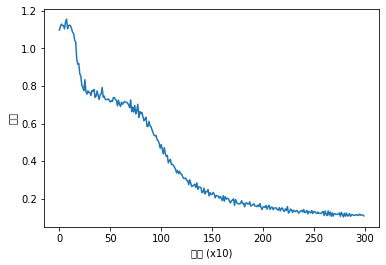

In [37]:
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from ch01.two_layer_net import TwoLayerNet

max_epoch=300
batch_size=30
hidden_size=10
learning_rate=1.0

x,t=spiral.load_data()
model=TwoLayerNet(input_size=2,hidden_size=hidden_size,output_size=3)
optimizer=SGD(lr=learning_rate)

trainer=Trainer(model,optimizer)
trainer.fit(x,t,max_epoch,batch_size,eval_interval=10)
trainer.plot()